## Name: Crystal Lau
## Date: 6/1/2018
## Unit 1 Capstone: Narrative Analytics and Experimentation

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

choc_data = pd.read_csv('flavors_of_cacao.csv')

choc_copy = choc_data.copy()

In [2]:
# preview of data
choc_data.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


# Data Cleaning and Exploration

In [3]:
# looking at the data columns provided
choc_data.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [4]:
# renaming columns into workable titles without all the newline nonsense
choc_data.columns = ['Company', 'Specific_Bean_Origin', 'REF', 'Review_Date', 'Cocoa_Percent', 'Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Origin']

In [5]:
# data types of the columns
choc_data.dtypes

Company                  object
Specific_Bean_Origin     object
REF                       int64
Review_Date               int64
Cocoa_Percent            object
Company_Location         object
Rating                  float64
Bean_Type                object
Broad_Bean_Origin        object
dtype: object

In [6]:
# stripping '%' and conversion to float for 'Cocoa_Percent' column
choc_data['Cocoa_Percent'] = choc_data['Cocoa_Percent'].str.strip('%').astype(float)

In [7]:
choc_data.describe()

,REF,Review_Date,Cocoa_Percent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,71.698329,3.185933
std,552.886365,2.927210,6.323118,0.478062
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,2.875000
50%,1069.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


The rating for each chocolate is graded on a scale of 1 to 5, with 5 being the highest. 

In [8]:
# list of unique companies
np.unique(choc_data['Company'])

array(['A. Morin', 'AMMA', 'Acalli', 'Adi', 'Aequare (Gianduja)',
       'Ah Cacao', "Akesson's (Pralus)", 'Alain Ducasse', 'Alexandre',
       'Altus aka Cao Artisan', 'Amano', 'Amatller (Simon Coll)',
       'Amazona', 'Ambrosia', 'Amedei', 'Anahata', 'Animas', 'Ara',
       'Arete', 'Artisan du Chocolat', 'Artisan du Chocolat (Casa Luker)',
       'Askinosie', 'Bahen & Co.', 'Bakau', 'Bar Au Chocolat',
       "Baravelli's", 'Batch', 'Beau Cacao', 'Beehive', 'Belcolade',
       'Bellflower', 'Belyzium', 'Benoit Nihant', 'Bernachon',
       'Beschle (Felchlin)', 'Bisou', 'Bittersweet Origins',
       'Black Mountain', 'Black River (A. Morin)', 'Blanxart',
       'Blue Bandana', 'Bonnat', 'Bouga Cacao (Tulicorp)', 'Bowler Man',
       "Brasstown aka It's Chocolate", 'Brazen', 'Breeze Mill', 'Bright',
       'Britarev', 'Bronx Grrl Chocolate', 'Burnt Fork Bend', 'C-Amaro',
       'Cacao Arabuco', 'Cacao Atlanta', 'Cacao Barry', 'Cacao Hunters',
       'Cacao Market', 'Cacao Prieto', 'Ca

In [12]:
# top 10 companies with most chocolates under their belt
company_group = choc_data.groupby('Company', as_index=False).count()
company_group.sort_values(by=['Rating'], ascending=False, inplace=True)
company_group[:10]

,Company,Specific_Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
353,Soma,47,47,47,47,47,47,46,47
41,Bonnat,27,27,27,27,27,27,27,27
157,Fresco,26,26,26,26,26,26,26,26
312,Pralus,25,25,25,25,25,25,25,25
0,A. Morin,23,23,23,23,23,23,23,23
127,Domori,22,22,22,22,22,22,22,22
18,Arete,22,22,22,22,22,22,22,22
170,Guittard,22,22,22,22,22,22,22,22
389,Valrhona,21,21,21,21,21,21,21,21
189,Hotel Chocolat (Coppeneur),19,19,19,19,19,19,19,19


In [37]:
# grouping average rating by percentage of cocoa in chocolate
percentage_group = choc_data.groupby('Cocoa_Percent', as_index=False).mean()
percentage_group = percentage_group.sort_values(by='Rating', ascending=False)
percentage_group[:10]

,Cocoa_Percent,REF,Review_Date,Rating
2,50.0,572.000000,2010.000000,3.750000
12,63.0,1059.833333,2012.416667,3.604167
18,69.0,935.500000,2012.000000,3.500000
15,66.0,802.391304,2011.130435,3.380435
16,67.0,956.000000,2011.851852,3.351852
29,78.0,1244.529412,2013.411765,3.338235
17,68.0,989.468085,2012.148936,3.287234
19,70.0,1161.764881,2012.977679,3.276042
38,87.0,785.000000,2011.000000,3.250000
5,56.0,949.000000,2012.000000,3.250000


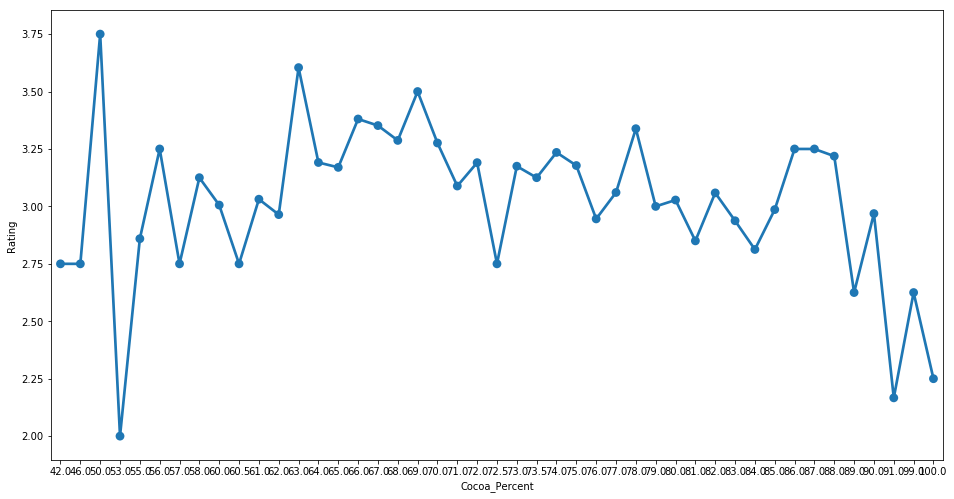

In [36]:
# Average Rating of Chocolates by Cocoa Percentage
fig, ax = plt.subplots()
fig.set_size_inches(16, 8.27)
sns.pointplot(x='Cocoa_Percent', y='Rating', data=percentage_group, ax=ax)

In [10]:
# sorting chocolate by most common broad bead origin
origin = choc_data.groupby('Broad_Bean_Origin').count()
origin = origin.sort_values(by='Company', ascending=False)
origin[:5]

,Company,Specific_Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type
Broad_Bean_Origin,,,,,,,,
Venezuela,214,214,214,214,214,214,214,214
Ecuador,193,193,193,193,193,193,193,193
Peru,165,165,165,165,165,165,165,165
Madagascar,145,145,145,145,145,145,145,145
Dominican Republic,141,141,141,141,141,141,141,141


## Analysis Plan

Question: How does the brand of chocolate affect it's rating within the same cocoa_percentage, do certain brands perform better with certain percentages compared to others?

**Hypothesis:** Certain brands receive better ratings depending on the percentage of cocoa in the chocolate.

**Null hypothesis:** Brand name has no effect on the rating of the chocolate.

## Rollout Plan

**Experimental Set-up**

*intended variables of study:* Company and Cocoa Percentage
1. Select chocolates of different cocoa percentages from the same broad bean origin
2. Select percentages of 50%, 75% and 100% cocoa percentage to sample from each company from the same broad bean origin
3. For each participant, have them test taste the chocolate set (i.e. the 50% chocolates from top 5 companies with the best overall ratings from the same broad bean origin - Venezuela)
4. Have the participant rate them on a scale of 1 to 5

**Secondary Metric**
- Age of subject: can be used to see if age factored into the ratings in post-analysis
- Broad Bean Origin: to control for cocoa imported from different locations affecting the results

## Evaluation Plan

From the experiment we should have data that looks like for each cocoa percentage:

**Participant: John Doe**

50%/75%/100% Cocoa Percentage Ratings

*Broad bean origin: Venezuela

- Company 1
- Company 2
- Company 3
- Company 4
- Company 5

Then to determine whether a particular company does better for each tier of cocoa percentage, can perform a t-test across the sample means from each company for each percentage. For example, looking at all of the data from each company's 50% ratings and compare them to the other companies'. If the p-values is less than 0.05 then it is sufficient to reject the null hypothesis saying that the difference between the ratings is significant enough to not be due to chance. We can propose that depending on the percentage, certain brands do fare better.